## import **numpy**, **scikit learn**, **matplotlib**, **seaborn** and **pandas**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# ***Read CSV file***

In [6]:
data = pd.read_csv("C:\\insurance.csv")

# ***Check data***

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# ***Data overview***

In [8]:
data.shape

(1338, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# ***Statistical summary***

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Summary statistics for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nValue Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())


Value Counts for Categorical Columns:

Column: sex
sex
male      676
female    662
Name: count, dtype: int64

Column: smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

Column: region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# ***Check for messing data***

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# ***Check duplicates***

In [18]:
data.duplicated().sum()

0

# ***Handling duplicated values***

In [14]:
data = data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

# ***4. Exploratory Data Analysis (EDA)***

In [16]:
pip install summarytools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 39.2 (14.0)min < med < max:18.0 < 39.0 < 64.0IQR (CV) : 24.0 (2.8),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACXklEQVR4nO3cT27aQBiH4W9KCOaPbCEk2HGBSl2w9CF62B4hC07ADdghIQTCiYUx7qJCaSsVYruOfzbvs43GQaOXAY8YuyzLDFDxpe4XAPzu6dYfnXN9M3sueO1TlmVvBcfiQf0zSOdcfzKZfPd9f1zkwofDYeec+0GUyOPWCvns+/44DMO3IAjiPBfd7/fecrkcb7fbZzMjSHzYzY9sM7MgCOLpdPpa4Nr9AmPw4LipgRSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChBSChJS7vxhH9ThM966yINM07ZqZ75wrMrxVk3wLh+n+VEmQURR1kyT5Np/PO51OJ9cBMbNmTnKJVc4fjUbTMAwPHKarKMjT6fTked5gsVjEs9lsl2dsEye5zCqXJImXpunXXq/3wmG6ir9DDofDRzmxWPjI8Hq9Hq9Wq8H5fO5U9eKapHU3NXXeIBQ5Mrzb7Wp78yneTLUqSG4QPk51rloVpPG0jTwk56ptQZoZT9vIQ22uWhnkIymx3+tfLpduDf/X7Mb3T8kg65rkpimz33vdborj+MXMcq2QVe4zywVZ1yQ3UZn93jLbTVXuM8sFWdckmzV3ZS6y3/s/tpuq2GeWC/LqsyeZlVmDbJCfrc6VGe8I8i91ffzhF36gCykECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSl3HxSw3++9vBc9Ho+emVkURd5msxkwlrFX93r6Cb5xtK2GD1U3AAAAAElFTkSuQmCC"">",0(0.0%)
2,sex[object],1. male2. female,675 (50.5%)662 (49.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
3,bmi[float64],Mean (sd) : 30.7 (6.1)min < med < max:16.0 < 30.4 < 53.1IQR (CV) : 8.4 (5.0),548 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACV0lEQVR4nO3bwYraQBzH8f/UdYkKEbHozRco9ODRh+jD9hEq+AS+gTchSMTUYIzpoQvtFnaXjJPmt9nv5z6YwxfDZP7jqqoyQMWnth8A+NtD2w8QmnNuYGaPnssvVVWdQz4P6ulUkM65wXQ6/RbH8cRn/fF4PDjnvhNlezoVpJk9xnE8Wa1W5/F4nNdZmKZptNlsJkmSPJoZQbaka0Gamdl4PM5ns9lPj6WD4A+DWtjUQApBQkonX9m+yrLsm1nsnPNZzg49AIJ8kmVZvyiKr4vFotfr9WptiMzYoYdCkE8ul8tDFEXD5XKZz+fzQ5217NDDIch/jEYjdugtYlMDKQQJKQQJKQQJKQQJKQQJKZKffe6YaYxvt1s/9PPg/5EL8p6ZxqIoorIsv+R5/sPMfL4lomVyQdodM4273W6y3W6H1+u119TDoVmKQZqZ30zj4XDgtOSdY1MDKQQJKQQJKQQJKbKbmveGafMwCDIAps3DIcgAmDYPhyADYtr8fmxqIIUgIYUgIYUgIYUgIYUgIYUgIYUgIYUgIaWxkxouasFHI0FyUQu+mvqH5KIWvDQ6XMFFLdTFpgZSCBJSmIcUwPWHPwiyZVx/eI4gW8b1h+cIUgTXH35jUwMpBAkpBAkpBAkpBAkpBAkpBAkpBAkpr34YZ+pbX9fOwV8MkqlvfV08B3/tH5Kpb3FdPAd/8yybqW99vufgZVnGJva6Z7jig1J93RPkB3Xv6369Xs+SJPnsnDv6/PxLIb8ZZJqmUd1fO51OkZlZlmXRfr8fslZ3rY/z+dzYv+svSFme8aj5M/MAAAAASUVORK5CYII="">",0(0.0%)
4,children[int64],Mean (sd) : 1.1 (1.2)min < med < max:0.0 < 1.0 < 5.0IQR (CV) : 2.0 (0.9),6 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB5ElEQVR4nO3cwU7CQBRG4XulwWJiC8GwZMs7sPENfFi37mHPU7AhMsRYlEBdSAKaUG1N7J/M+bZkpixOIDMM42VZGqDiqu03AJxLql50956ZdRvO/V6WZdFwLCJ1MUh37w2Hw4csywZNJt5sNs/u/kiUqKPqE7KbZdlgOp0WeZ5v60waQkhns9lgtVp1zYwg8WuVX9lmZnmeb0ej0WuDuXsNxiByLGoghSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAh5cf/ZbeBK1ziJRckV7jETS5I4wqXqCkGaWZc4RIrFjWQQpCQQpCQQpCQIruoaQP7n+0jyCP2PzUQ5An7nwII8hv2P9vFogZSCBJSCBJSCBJSCBJSWGULYEP+hCBbxob8VwTZPjbkzxCkCDbkP7GogRSChBSChBSChBSChBSChBSChBSChBSChBSChBR+OoyY4ikjgozUX08ZrdfrF3d/MrNaB0KOLsZMkPFqfMpouVzezufz+/F4fNfpdGoHWXVk7scgQwhp3QeGENL9f

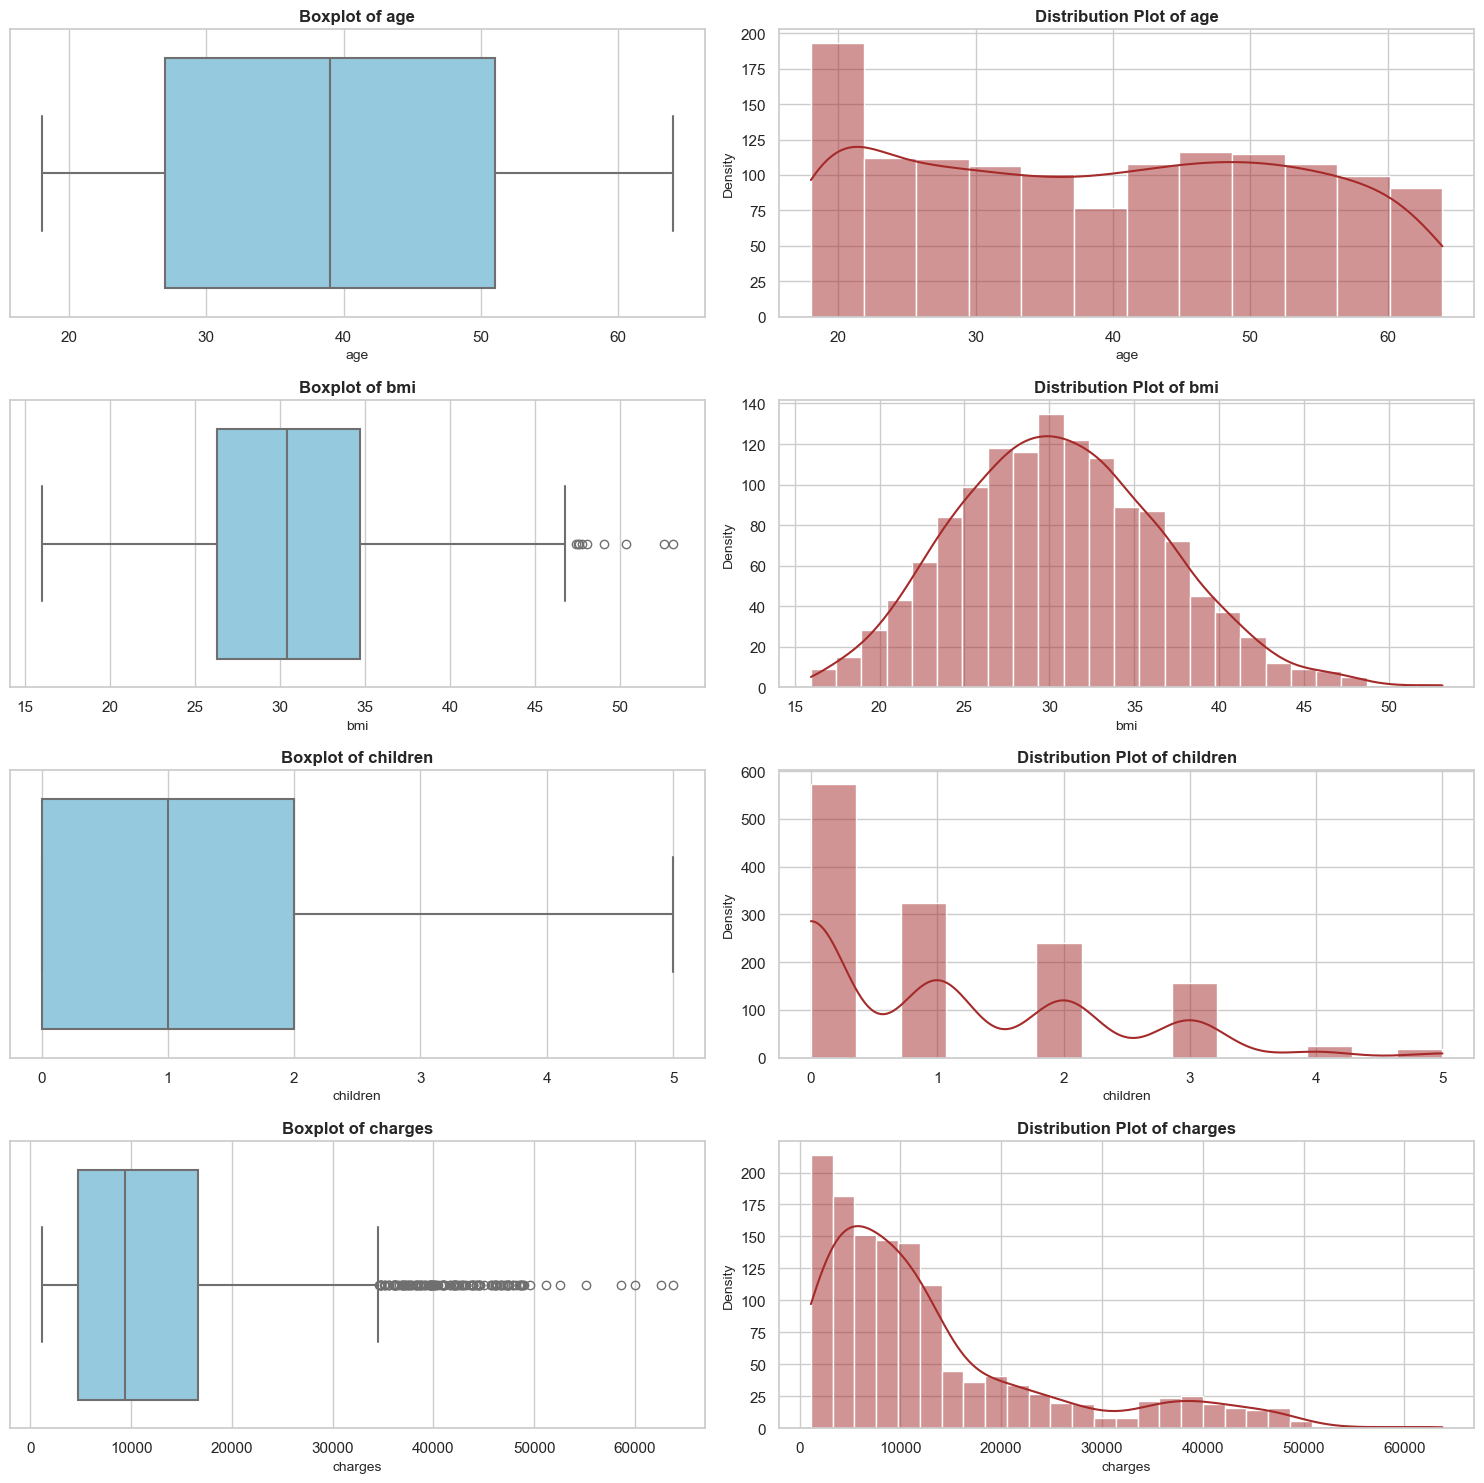

In [28]:
sns.set_theme(style="whitegrid", palette="pastel")
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.boxplot(data[col], orient='h', color="skyblue", linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)

    plt.subplot(len(numerical_columns), 2, 2 * i + 2)
    sns.histplot(data[col], kde=True, color="brown", linewidth=1)
    plt.title(f"Distribution Plot of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

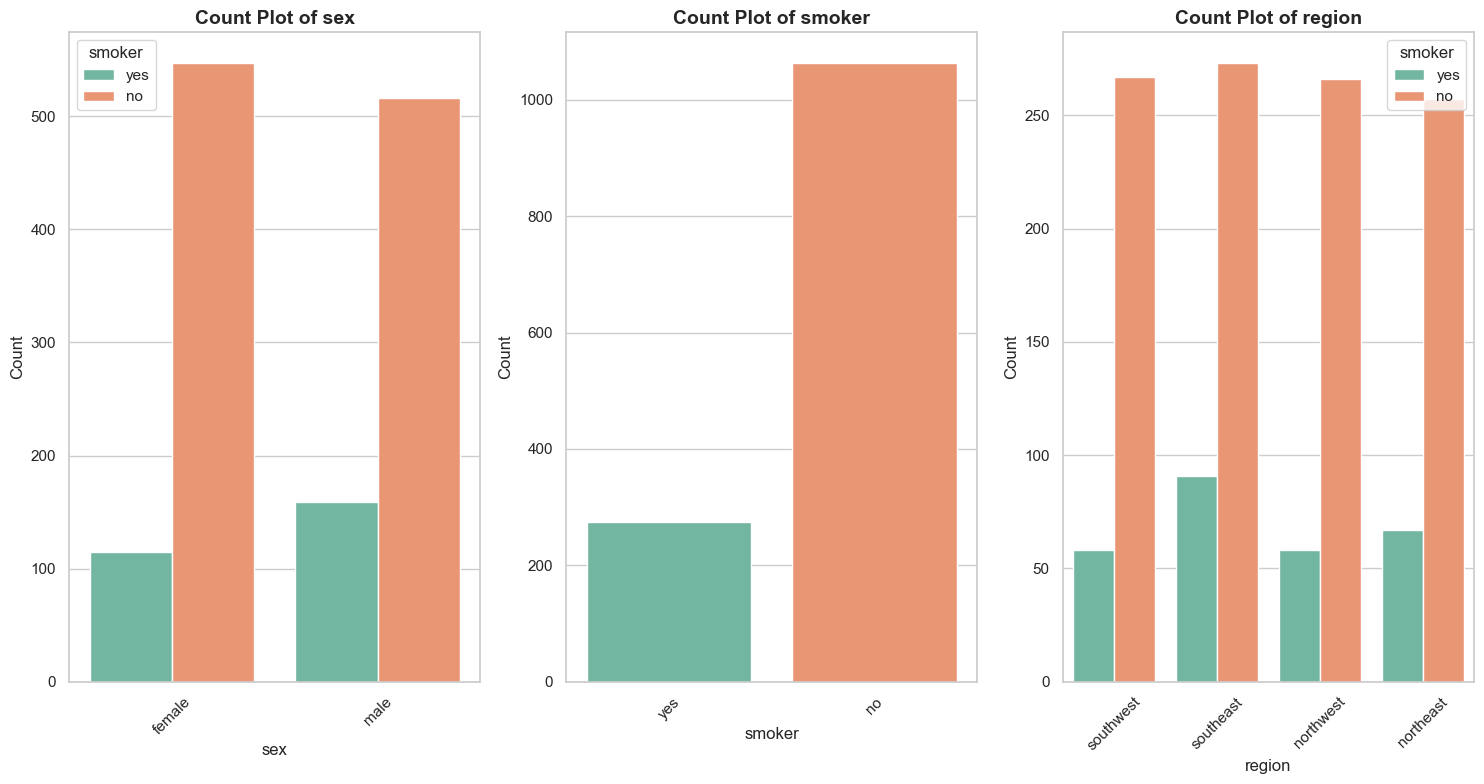

In [37]:
sns.set_theme(style="whitegrid", palette="pastel")
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 8))  

for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(x=col, data=data, palette='Set2',hue='smoker')
    plt.title(f"Count Plot of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [114]:
X = list(data.bmi)
Y = list(data.charges)
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [116]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [117]:
Y_predict = model.predict(X_test)

In [118]:
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

Intercept: 1353.0730722046683
Coefficient: 392.43654416987977


In [120]:
mse = mean_squared_error(Y_test, Y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 149085057.03839505


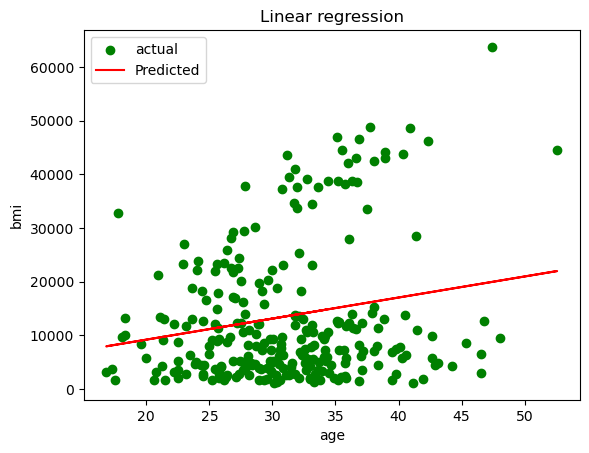

In [122]:
plt.scatter(X_test,Y_test,color="green",label="actual")
plt.plot(X_test,Y_predict,color="red",label="Predicted")
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("Linear regression")
plt.legend()
plt.show()

In [90]:
data.loc[1300,["bmi","charges"]]

bmi              30.36
charges    62592.87309
Name: 1300, dtype: object

In [89]:
model.predict([[30.36]])

array([[13267.4465532]])

In [94]:
from math import sqrt
def mean(arr):
    return sum(arr)/len(arr)

def variance(arr):
    m = mean(arr)
    s = 0
    for i in arr:
        s = s +pow((i-m),2)
    return s/(len(arr)-1)

def standard_deviation(arr):
    return sqrt(variance(arr))
    
def covariance(X,Y) :
    mX = mean(X)
    mY = mean(Y)
    cov = 0
    N = len(X)
    for x,y in zip(X,Y):
        cov = cov + ((x-mX)*(y-mY))
    return cov/N

def correlation(X,Y) :
    dev_X = standard_deviation(X)
    dev_Y = standard_deviation(Y)
    cov = covariance(X,Y)
    return cov/(dev_X*dev_Y)

In [123]:
Xcor = list(data.bmi)
Ycor = list(data.charges)
print(correlation(X,Y))

[0.19819273]


C:\Users\KHALID\AppData\Local\Temp\ipykernel_3904\1402327514.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sqrt(variance(arr))
